In [2]:
from scipy import optimize
import cvxopt

import matplotlib.pyplot as plt

import numpy as np

import sympy
sympy.init_printing()

In [3]:
# Minimize the area of a cylinder with unit volume
r, h = sympy.symbols("r, h")

Area = 2 * sympy.pi * r**2 + 2 * sympy.pi * r * h

Volume = sympy.pi * r**2 * h

h_r = sympy.solve(Volume - 1)[0]

Area_r = Area.subs(h_r)

rsol = sympy.solve(Area_r.diff(r))[0]
rsol

In [4]:
_.evalf()

In [5]:
Area_r.diff(r, 2).subs(r, rsol)

In [6]:
Area_r.subs(r, rsol)

In [7]:
_.evalf()

In [8]:
def f(r):
    return 2 * np.pi * r**2 + 2 / r

r_min = optimize.brent(f, brack=(0.1, 4))
r_min

In [9]:
f(r_min)

In [10]:
optimal = optimize.minimize_scalar(f, bracket=(0.1, 4))

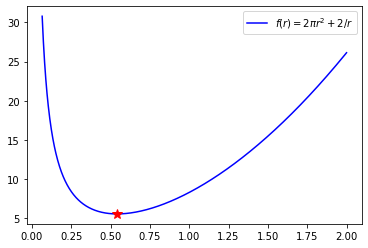

In [11]:
r = np.linspace(0.065, 2, 1000)

fig, ax = plt.subplots()

ax.plot(r, f(r), color="blue", label="$f(r)=2{\pi}r^2 + 2 / r$")
ax.plot(optimal.x, optimal.fun, "*", color="red", markersize=10)
ax.legend()

### Multivariable optimization example

In [24]:
x1, x2 = sympy.symbols("x_1, x_2")

f_sym = (x1-1)**4 + 5 * (x2-1)**2 - 2*x1*x2

fprime_sym = [f_sym.diff(x_) for x_ in (x1, x2)]
fprime_sym


In [13]:
sympy.Matrix(fprime_sym)

⎡                  3⎤
⎢-2⋅x₂ + 4⋅(x₁ - 1) ⎥
⎢                   ⎥
⎣-2⋅x₁ + 10⋅x₂ - 10 ⎦

In [23]:
fhess_sym = [
    [f_sym.diff(x1_, x2_) for x1_ in (x1, x2)]
    for x2_ in (x1, x2)
]
fhess_sym

In [15]:
sympy.Matrix(fhess_sym)

⎡           2    ⎤
⎢12⋅(x₁ - 1)   -2⎥
⎢                ⎥
⎣     -2       10⎦

In [16]:
f_lmbda = sympy.lambdify((x1, x2), f_sym, 'numpy')
fprime_lmbda = sympy.lambdify((x1, x2), fprime_sym, 'numpy')
fhess_lmbda = sympy.lambdify((x1, x2), fhess_sym, 'numpy')

In [18]:
def func_XY_to_X_Y(f):
    """
    Wrapper for f(X) -> f(X[0], X[1])
    """
    return lambda X: np.array(f(X[0], X[1]))

f = func_XY_to_X_Y(f_lmbda)
fprime = func_XY_to_X_Y(fprime_lmbda)
fhess = func_XY_to_X_Y(fhess_lmbda)

In [19]:
x_opt = optimize.fmin_ncg(f, (0, 0), fprime=fprime, fhess=fhess)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Hessian evaluations: 8


In [20]:
x_opt

array([1.88292613, 1.37658523])

### Contour plot example

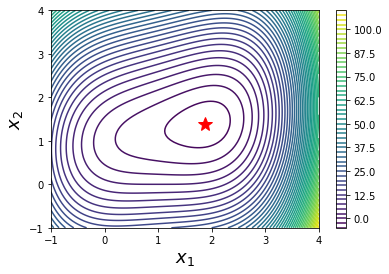

In [44]:
fig, ax = plt.subplots(figsize=(6, 4))
x_ = y_ = np.linspace(-1, 4, 100)

X, Y = np.meshgrid(x_, y_)

c = ax.contour(X, Y, f_lmbda(X, Y), 50)
ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

plt.colorbar(c, ax=ax)

In [45]:
# Broyden-Fletcher-Goldfarb-Shanno (BFGS)

x_opt = optimize.fmin_bfgs(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 13
         Gradient evaluations: 13


In [46]:
x_opt

array([1.88292645, 1.37658596])

In [48]:
# conjugate gradient methods

x_opt = optimize.fmin_cg(f, (0, 0), fprime=fprime)

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 8
         Function evaluations: 18
         Gradient evaluations: 18


In [49]:
x_opt

array([1.88292612, 1.37658523])

In [52]:
# without providing a function for the gradient as well

x_opt = optimize.fmin_bfgs(f, (0, 0))

Optimization terminated successfully.
         Current function value: -3.867223
         Iterations: 9
         Function evaluations: 39
         Gradient evaluations: 13


In [53]:
x_opt

array([1.88292644, 1.37658595])

In [54]:
def f(X):
    x, y = X
    return (4 * np.sin(np.pi * x) + 6 * np.sin(np.pi * y)) + (x - 1)**2 + (y - 1)**2

In [56]:
x_start = optimize.brute(f, (slice(-3, 5, 0.5), slice(-3, 5, 0.5)), finish=None)
x_start

array([1.5, 1.5])

In [57]:
f(x_start)

In [58]:
x_opt = optimize.fmin_bfgs(f, x_start)

Optimization terminated successfully.
         Current function value: -9.520229
         Iterations: 4
         Function evaluations: 21
         Gradient evaluations: 7


In [59]:
x_opt

array([1.47586906, 1.48365787])

In [60]:
f(x_opt)

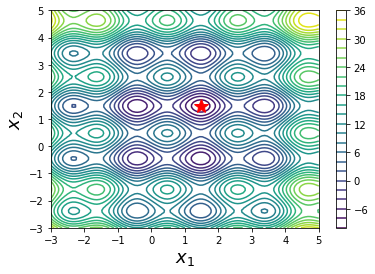

In [62]:
def func_X_Y_to_XY(f, X, Y):
    """
    Wrapper for f(X, Y) -> f([X, Y])
    """
    s = np.shape(X)
    return f(np.vstack([X.ravel(), Y.ravel()])).reshape(*s)

fig, ax = plt.subplots(figsize=(6, 4))
    
x_ = y_ = np.linspace(-3, 5, 100)
X, Y = np.meshgrid(x_, y_)

c = ax.contour(X, Y, func_X_Y_to_XY(f, X, Y), 25)

ax.plot(x_opt[0], x_opt[1], 'r*', markersize=15)

ax.set_xlabel(r"$x_1$", fontsize=18)
ax.set_ylabel(r"$x_2$", fontsize=18)

plt.colorbar(c, ax=ax)

In [65]:
optimize.minimize(f, x_start, method= 'BFGS')

      fun: -9.520229273055016
 hess_inv: array([[2.41596001e-02, 4.61008275e-06],
       [4.61008275e-06, 1.63490348e-02]])
      jac: array([-7.15255737e-07, -7.15255737e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([1.47586906, 1.48365787])